In [1]:
import numpy as np
import sys
import dimod
import matplotlib.pyplot as plt

from dwave.system import EmbeddingComposite, DWaveSampler
from pythia_generator import generator
from qubo_generator import make_qubo
from embedding_generator import generate_embedding

In [2]:
# Generate a Pythia event
particles = generator()

In [3]:
# Use particles in event to generate qubo
qubo, offset = make_qubo(particles, np.pi/4.)

In [4]:
embedding = generate_embedding(len(particles))

Embedding on 595 spin variables


In [5]:
# Get distribution of chain lengths
chain_length = []
for i in range(len(embedding)):
    chain_length.append(len(embedding[i]))

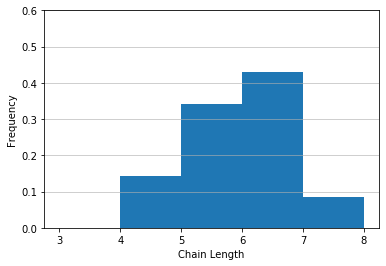

In [6]:
# Plot results
counts, bins = np.histogram(chain_length, range(3,9), density=True)
plt.hist(bins[:-1], bins, weights=counts)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Chain Length')
plt.ylabel('Frequency')
plt.ylim(0,0.6)
plt.savefig('images/chainlength_dist.png')

In [7]:
x_val = []
y_val = []
z_val = []

n_part = len(particles)

for i in range(0,n_part):
    key_x = 's[%s]' %i
    for j in range(0,n_part):
        key_y = 's[%s]' %j
        try:
            value = qubo[key_x, key_y]
            x_val.append(i)
            y_val.append(j)
            z_val.append(value)
        except KeyError:
            #print(key_x, key_y)
            continue
            

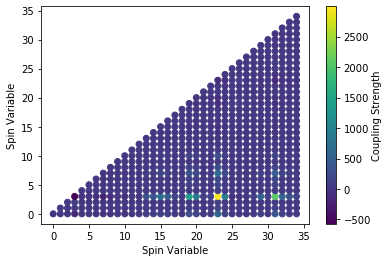

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

plt.scatter(x_val, y_val, c = z_val)
plt.xlabel('Spin Variable')
plt.ylabel('Spin Variable')

cbar = plt.colorbar()
cbar.set_label("Coupling Strength", labelpad=+1)

plt.savefig('images/coupling_strength.png')
plt.show()

In [45]:
np.max(z_val)

2995.383114874047

In [43]:
z_val

[-20.444190812498423,
 -1.44040680416931,
 -2.175594310568884,
 5.035072599552625,
 -0.5868916217657522,
 -0.8853376588798813,
 -174.33809355379887,
 19.22418528334938,
 71.45356918785572,
 -570.5384760356283,
 -4.321629706337984,
 0.3508408017519349,
 1.745322146023024,
 -28.39917989933877,
 -0.35494997224240826,
 -9.07795944391442,
 3.0434483868483775,
 4.440437656283331,
 -57.307722144504766,
 -1.3826272341715484,
 -1.7309845933084707,
 -15.713938987773119,
 0.9777079888252721,
 3.9224856344988295,
 -82.45891963974566,
 -2.033198400348566,
 -4.437638556370341,
 -3.355653484571965,
 -37.50306895488038,
 -7.320608532952978,
 9.342296643151595,
 -211.0692289029091,
 -5.485161875172074,
 -7.264493136299629,
 -15.257937476133792,
 -29.548976801622583,
 -18.91486350574785,
 -2.6343124444120436,
 2.4968070109025855,
 -87.32466070589022,
 -2.2231487946764874,
 -3.7117957327110864,
 -7.250097821336954,
 -22.57276603932605,
 -4.950442405780223,
 -0.26319943054592365,
 -0.278993858117314,
 0.1